
# Expectation Maximation Algorithm  For Clustering With Iris Dataset
---
**Name:**
 Kieleh Ngong Ivoline-Clarisse 
 
**Number:**
178229001010

**Date:**
04/11/2018

---

## Expectation Maximum Algorithm
Inorder to explain the expectation maximization algorithm, we are going to implement the K-means algorithm using the iris dataset. 
In the iris dataset we know we have 3 types of iris flowers, hence we need to have 3 clusters. 
If we knew the Gaussians (means and variance) for each cluster, we will easily determine which point belongs to which flower type. 
And if we knew which flower type point belonged to which flower type we will be easily determine the Gaussians. 
In this case, we care stuck. 

This is where the EM algorithm comes in to save the situation. The EM algorithm includes 1 steps:

1) Start with 3 randomly placed Gausians(In this case the centers)

2) For each data point determine the probability that this data point belongs to a particular label/cluster. (E-step)

3) Adjust the Gausians to fit the points assigned to them (M-step)

4) Iterate until convergence

We see here that EM algorithm is very similar to k-means. Infact K-means is a special case of the EM algorithm.
##### E-step as:

Assign data points to the closest means (Update the cluster): 

$C_{t(i)} = argmin_{j=1,...,k} \hspace{1mm}||X_{i}-\mu_{j}^{i-1}||_{2}^{2}$

##### and M-step as:

Compute cluster means for cluster $C_{t-1}$ for $t=1,2,...$: 

$\mu_{j}^{(i-1)} = \tfrac{1}{n_{j}^{(i-1)}} \sum\limits_{i: C_{(i)=j}} x_{i}, \hspace{5mm} for \hspace{2mm}\forall \hspace{1mm}j = i,...,k$


We can see from the above that:
- The Expectation step(E-step) involves updating our expectation of which each cluster belongs to. 
- The Maximization step (M-step) involves maximizing some fitness function that defines the location of each cluster. This is done here by finding the mean of the data in which each cluster belongs

## About the dataset
The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.
It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.
The columns in this dataset are:
- Id
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm
- Species

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances_argmin
plt.rc("font", size=14)
sns.set(style="white") 
sns.set(style="whitegrid", color_codes=True)

In [6]:
# load dataset
dataframe = pd.read_csv("iris.csv", header=None)
dataset = dataframe.values
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]

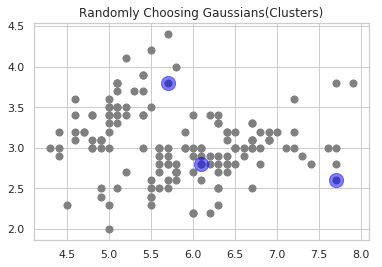

In [7]:
#Define number of clusters
n_clusters = 3

# 1. Randomly choose clusters
rng = np.random.RandomState(42)
i = rng.permutation(X.shape[0])[:n_clusters]
centers = X[i]
plt.title('Randomly Choosing Gaussians(Clusters)')
plt.scatter(X[:, 0], X[:, 1], c='gray', s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.5);

count = 1

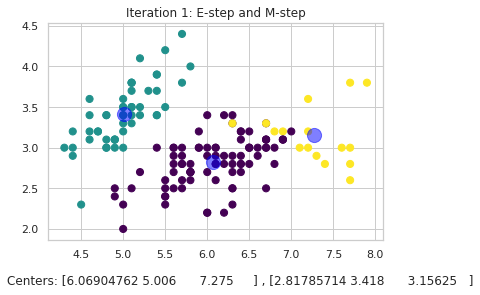

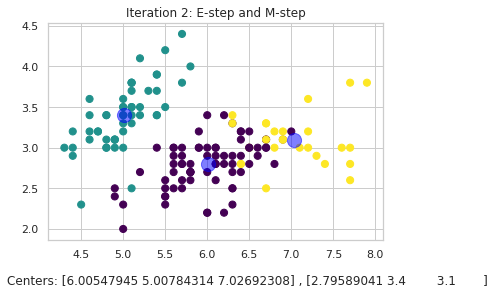

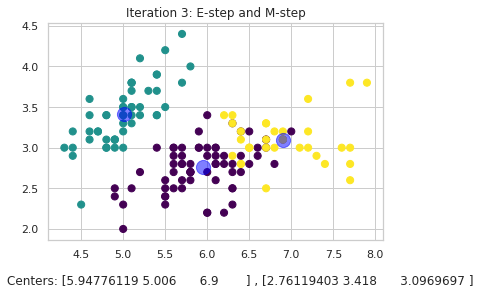

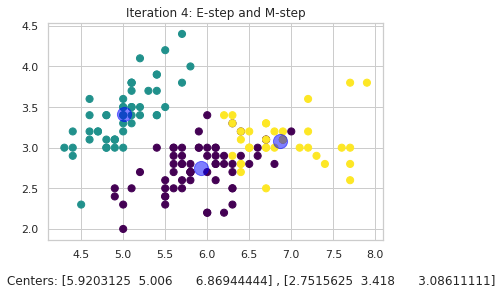

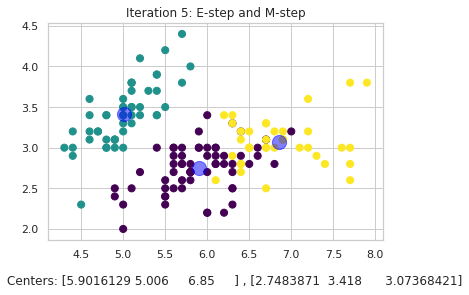

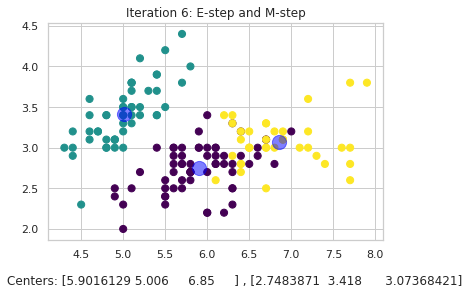

In [8]:
 while True:
        # E-step
        # 2a. Assign tags based on closest center
        tags = pairwise_distances_argmin(X, centers)
        
        # M-step
        # 2b. Find new centers from means of points
        new_centers = np.array([X[tags == i].mean(0)
                                for i in range(n_clusters)])
        plt.figure()
        plt.title('Iteration {}: E-step and M-step'.format(count))
        plt.scatter(X[:, 0], X[:, 1], c=tags, s=50, cmap='viridis')
        plt.scatter(new_centers[:, 0], new_centers[:, 1], c='blue', s=200, alpha=0.5);
        plt.figtext(0.03, -0.03,'Centers: {} , {}'.format(new_centers[:, 0], new_centers[:, 1]) )
        count = count + 1
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            
            break
        #Finish iteration
        centers = new_centers
        

Text(0.5, 1.0, 'Final Clusters')

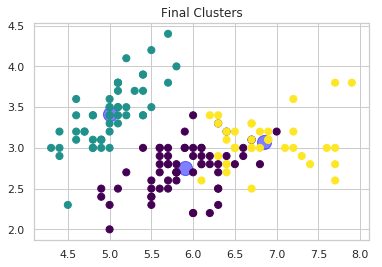

In [9]:
# Iterations end with the following clusters
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.5);
plt.scatter(X[:, 0], X[:, 1], c=tags,s=50, cmap='viridis');
plt.title('Final Clusters')